### Analisis Titanic Dataset
Pada projek ini, saya akan melakukan berbagai analisis terhadap dataset titanic, dengan tujuan untuk memprediksi kemungkinan hidup pada kondisi tertentu. Saya akan mengeksplorasi keterkaitan antara satu data dengan yang lain. Untuk penyelesaiannya, saya akan menggunakan berbagai klasifikasi model.  

#### 1. Ekplorasi Data
Objektif pertama pada projek ini adalah untuk mengeksplorasi keterkaitan antar data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("data/train_and_test2.csv", nrows=1002)
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1002 non-null   int64  
 1   Age          1002 non-null   float64
 2   Fare         1002 non-null   float64
 3   Sex          1002 non-null   int64  
 4   sibsp        1002 non-null   int64  
 5   zero         1002 non-null   int64  
 6   zero.1       1002 non-null   int64  
 7   zero.2       1002 non-null   int64  
 8   zero.3       1002 non-null   int64  
 9   zero.4       1002 non-null   int64  
 10  zero.5       1002 non-null   int64  
 11  zero.6       1002 non-null   int64  
 12  Parch        1002 non-null   int64  
 13  zero.7       1002 non-null   int64  
 14  zero.8       1002 non-null   int64  
 15  zero.9       1002 non-null   int64  
 16  zero.10      1002 non-null   int64  
 17  zero.11      1002 non-null   int64  
 18  zero.12      1002 non-null   int64  
 19  zero.1

Dikarenakan terdapat data null, kita akan menghapusnya saja(2 baris), sehingga data tersisa 1000 baris. 

In [62]:
titanic.dropna(inplace = True)

In [5]:
X = titanic.drop(columns = ['2urvived'], axis = 1)
y = titanic['2urvived']

X.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0,0
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,2.0,0,0
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0


Graph pertama yang akan saya buat adalah histogram keterkaitan data antara age, sex, dengan survived.

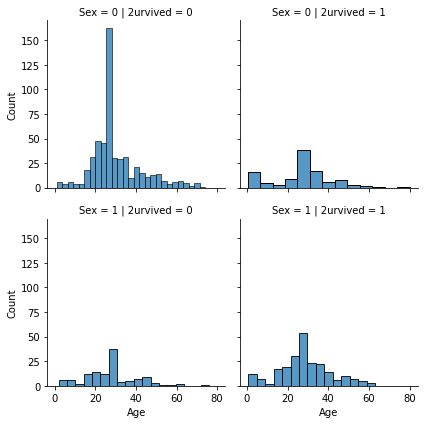

In [61]:
g = sns.FacetGrid(titanic, col = '2urvived', row = 'Sex')
g.map_dataframe(sns.histplot, x = 'Age')

In [7]:
#Drop kolom dengan nunique < 2
titanic2 = titanic[[col for col in titanic if titanic[col].nunique() > 1]]
titanic2.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', '2urvived'],
      dtype='object')

In [17]:
g.map_dataframe(sns.histplot, x = 'Fare')

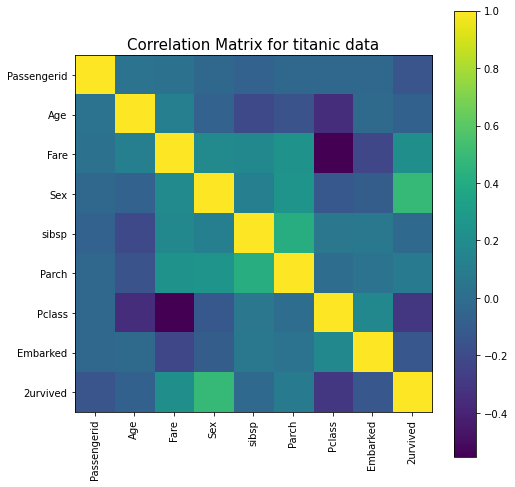

In [57]:
corr = titanic2.corr() #fungsi corr akan mereturn correlation antar kolom
plt.figure(figsize = (8,8), facecolor = 'w', edgecolor = 'k') #membuat figure
corrMat = plt.matshow(corr, fignum = 1) #fungsi matshow akan mereturn matrix heatmap seperti pada hasil
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90) #membuat label pada tiap kolom x 
plt.yticks(range(len(corr.columns)), corr.columns) #membuat label pada tiap kolom y
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat) #memvisualisasikan corrmat
plt.title(f'Correlation Matrix for titanic data', fontsize=15) #judul
plt.show()